# JuliaGeo
JuliaGeo is a ([Github](https://github.com/JuliaGeo/)) organization that contains a number of related Julia projects for manipulating, querying, and processing geospatial geometry data. We aim to provide a common interface between geospatial packages. We also have a [website](https://juliageo.org).

We previously presented about JuliaGeo related work in:
- [FOSS4G2019 | JuliaGeo: A Fresh Approach to GeospatialComputing](https://media.ccc.de/v/bucharest-428-juliageo-a-fresh-approach-to-geospatial-computing)
- [JuliaCon2020 | GeoInterface: bringing geospatial packages together](https://www.youtube.com/watch?v=wih_DIWODUs)
- [JuliaCon2022 | State of JuliaGeo](https://www.youtube.com/watch?v=xMRcIpt6Ris)

The geospatial stack is not as mature as others (yet), mostly due to its age as Python and R have had a 20 years headstart. However, it is already easy to install the required C dependencies and read all common data formats into Julia types that can be used across the ecosystem.

In [1]:
]add ArchGDAL, RasterDataSources

   Resolving package versions...
  No Changes to `~/code/Project.toml`
  No Changes to `~/code/Manifest.toml`


In [2]:
using GeoDataFrames, DataFrames, Rasters, GeoArrays, GeoInterface, Downloads, Plots, ArchGDAL, RasterDataSources

## Raster data
Let's download and open a small geotiff file. We use `Rasters`, a package inspired by rasterio in Python.

In [46]:
url = "https://github.com/yeesian/ArchGDALDatasets/blob/master/data/utmsmall.tif?raw=true"
fn = "utmsmall.tif"
fn = isfile(fn) ? fn : Downloads.download(url, "utmsmall.tif")
isfile(fn)

true

In [47]:
using Rasters
raster = Raster(fn)

100×100 Raster{UInt8,2} with dimensions: 
  X Projected{Float64} LinRange{Float64}(440720.0, 446660.0, 100) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(3.75126e6, 3.74532e6, 100) ReverseOrdered Regular Intervals crs: WellKnownText
and reference dimensions: 
  Band Categorical{Int64} 1:1 ForwardOrdered
extent: Extent(X = (440720.0, 446720.0), Y = (3.74532e6, 3.75132e6))crs: PROJCS["NAD27 / UTM zone 11N",GEOGCS["NAD27",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4267"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],A

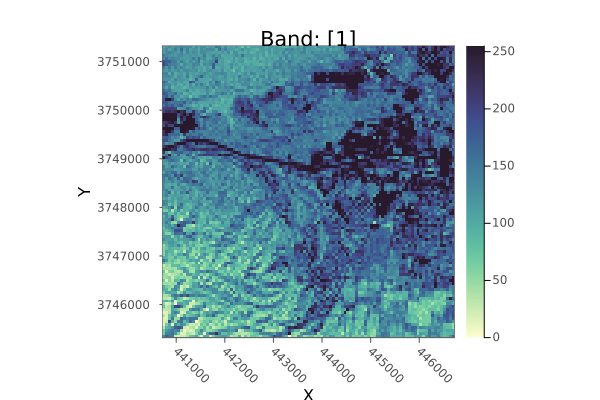

In [48]:
p = plot(raster; c=:deep)

We can request the coordinates of a (center of a) cell with `coords`, and also do the inverse with `indices`

In [97]:
@time view(raster, X(446000..446660), Y(3.75e6..3.75126e6))

  0.000009 seconds (1 allocation: 208 bytes)


11×21 Raster{UInt8,2} with dimensions: 
  X Projected{Float64} LinRange{Float64}(446000.0, 446600.0, 11) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(3.7512e6, 3.75e6, 21) ReverseOrdered Regular Intervals crs: WellKnownText
and reference dimensions: 
  Band Categorical{Int64} 1:1 ForwardOrdered
extent: Extent(X = (446000.0, 446660.0), Y = (3.75e6, 3.75126e6))crs: PROJCS["NAD27 / UTM zone 11N",GEOGCS["NAD27",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4267"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["E

This Raster behaves just like any Array in Julia. You can do math with it, or change the type.

In [107]:
nraster = clamp.(Float32.(raster) * 2, 100, 200)

100×100 Raster{Float32,2} with dimensions: 
  X Projected{Float64} LinRange{Float64}(440720.0, 446660.0, 100) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(3.75126e6, 3.74532e6, 100) ReverseOrdered Regular Intervals crs: WellKnownText
and reference dimensions: 
  Band Categorical{Int64} 1:1 ForwardOrdered
extent: Extent(X = (440720.0, 446720.0), Y = (3.74532e6, 3.75132e6))crs: PROJCS["NAD27 / UTM zone 11N",GEOGCS["NAD27",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4267"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]

Saving to file is as easy as reading it

In [108]:
Rasters.write("test.tif", nraster)

"test.tif"

Rasters can also rasterize points, create a raster from scratch, work on NetCDF files, do zonal statistics and more. Please check the documentation https://rafaqz.github.io/Rasters.jl/stable/

## Vector data
We can also easily open vector datasets. We will use GeoDataFrames here, a package inspired by geopandas in Python.

In [53]:
url = "https://github.com/OpenGeoHub/spatial-prediction-eml/blob/master/input/gbif_aedes_albopictus.gpkg?raw=true"
fn = "gbif_aedes_albopictus.gpkg"
isfile(fn) || Downloads.download(url, fn)

true

In [65]:
df = GeoDataFrames.read(fn)

Row,geom,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,Date
,IGeometr…,Float64,String,String?,String,String,String,String,String,String,String,Missing,String,String,String,String?,String,String?,String?,String,Float64,String,Float64?,Missing,Float64?,Float64?,Missing,Missing,String,Float64?,Float64?,Float64,Float64,Float64,String,String?,String?,String?,Missing,String?,String?,String,String?,String?,Missing,String?,String,String?,String?,String
1,Geometry: wkbPoint,3.72352e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/226030224,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,missing,SPECIES,"Aedes albopictus (Skuse, 1894)",Aedes albopictus,missing,ES,Spain - Begur,missing,PRESENT,1.0,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,43.0,missing,missing,missing,missing,missing,2021-09-21 00:00:00,21.0,9.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,missing,Observations,OBS.226030224,missing,missing,missing,CC_BY_NC_4_0,Stichting Observation International,missing,missing,missing,2022-03-24 21:07:39,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-09-21
2,Geometry: wkbPoint,3.72315e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/229897504,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,missing,SPECIES,"Aedes albopictus (Skuse, 1894)",Aedes albopictus,missing,FR,France - Pau,missing,PRESENT,1.0,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,25.0,missing,missing,missing,missing,missing,2021-07-22 00:00:00,22.0,7.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,missing,Observations,OBS.229897504,missing,missing,missing,CC_BY_NC_4_0,Stichting Observation International,missing,missing,missing,2022-03-24 21:21:48,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-07-22
3,Geometry: wkbPoint,3.72176e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/222737616,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,missing,SPECIES,"Aedes albopictus (Skuse, 1894)",Aedes albopictus,missing,FR,France - Caluire-et-Cuire,missing,PRESENT,1.0,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,356.0,missing,missing,missing,missing,missing,2021-08-12 00:00:00,12.0,8.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,missing,Observations,OBS.222737616,missing,missing,missing,CC_BY_NC_4_0,Stichting Observation International,missing,missing,missing,2022-03-24 21:01:03,StillImage,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-08-12
4,Geometry: wkbPoint,3.72142e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/221356176,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,missing,SPECIES,"Aedes albopictus (Skuse, 1894)",Aedes albopictus,missing,ES,Spain - Elche,missing,PRESENT,1.0,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,4.0,missing,missing,missing,missing,missing,2021-07-28 00:00:00,28.0,7.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,missing,Observations,OBS.221356176,missing,missing,missing,CC_BY_NC_4_0,Stichting Observation International,missing,missing,missing,2022-03-24 20:56:46,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-07-28
5,Geometry: wkbPoint,3.71405e9,03269e13-84ae-430f-990e-f11069413e36,E-Montesacro-M5-2020-06-30-1,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,missing,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1894)","(Skuse, 1894)",IT,Monte

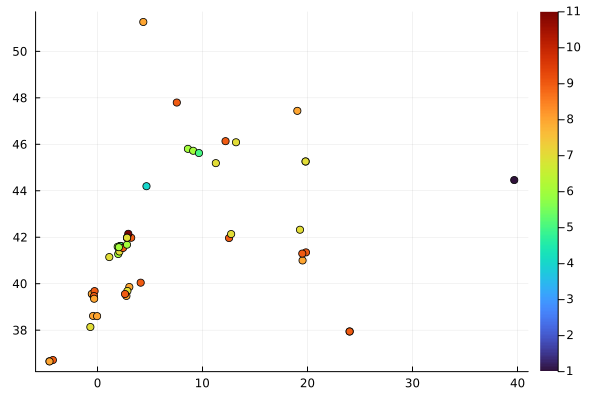

In [66]:
ndf = dropmissing(df, :month)
step = 250
subr = 1:step:nrow(ndf)  # this is how you make a range
plot(ndf.geom[subr], marker_z=ndf.month[subr]', c=:turbo)  # don't plot all points

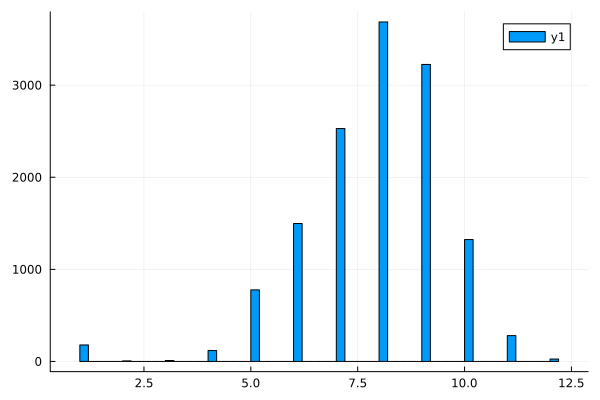

In [67]:
histogram(df.month)

We can also do geometric operations, like `buffer`. Note that we operate independent from the DataFrame, just on a Vector of geometries.

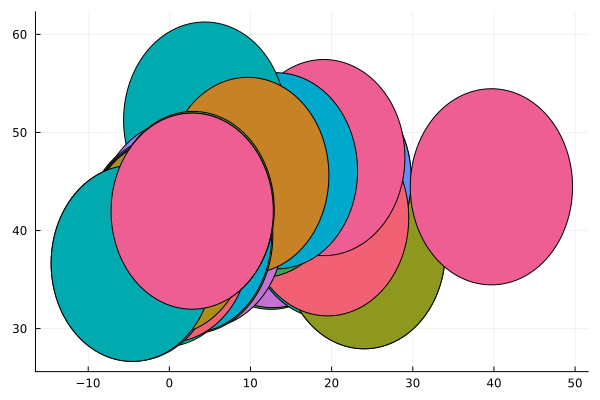

In [68]:
plot(GeoInterface.buffer.(df.geom[subr], 10))

The astute reader will note something wrong here. We buffered with `10`, but what unit is that? The distance is in the coordinate system, which is latitude/longitude here (some form of WGS84). If you expected something in meters, all answers will be wrong. Julia expects some responsibility from the user here (and in general).

In [73]:
DataFrames.metadata(df)  # no CRS(!) defined for this geopackage

Dict{String, Union{Nothing, Tuple{Symbol}}} with 2 entries:
  "geometrycolumns" => (:geom,)
  "crs"             => nothing

### Proj
Let's use the Proj package to project some data.

In [109]:
Pkg.add("Proj")
using Proj

   Resolving package versions...
  No Changes to `~/code/Project.toml`
  No Changes to `~/code/Manifest.toml`


In [80]:
trans = Proj.Transformation("EPSG:4326", "+proj=utm +zone=31 +datum=WGS84")

Transformation pipeline
    description: axis order change (2D) + UTM zone 31N
    definition: proj=pipeline step proj=axisswap order=2,1 step proj=unitconvert xy_in=deg xy_out=rad step proj=utm zone=31 ellps=WGS84
    direction: forward


In [86]:
@. trans(GeoInterface.coordinates(df.geom))  # Open PR to not need the GeoInterface here

13903-element Vector{Tuple{Float64, Float64}}:
 (5.209376604186281e6, 456552.49739319785)
 (5.412241069392668e6, -50731.29295413459)
 (5.754713873198218e6, 733179.8932641628)
 (4.68187355543689e6, -87588.90154608067)
 (5.080960560416632e6, 1.798244832580825e6)
 (4.365457390064061e6, 3.9054092442464735e6)
 (5.487505153230741e6, 2.350489741186236e6)
 (5.082739701223783e6, 1.799398637696565e6)
 (5.150989731892226e6, 288756.27863756026)
 (4.573765250143256e6, 2.7094693606671216e6)
 (5.078039242256529e6, 1.8109702117222908e6)
 (4.870748849152667e6, 361067.96092195663)
 (5.394598021868791e6, -419992.2062797706)
 ⋮
 (4.487757221573868e6, 3.5960106434823587e6)
 (4.947812193001832e6, 2.724578586965682e6)
 (5.343704296345204e6, 1.6325303912099127e6)
 (5.171601017402769e6, 391407.8382243044)
 (5.5555960208923435e6, 1.7709453930896844e6)
 (5.109021046712543e6, 243357.92512239376)
 (5.5555960208923435e6, 1.7709453930896844e6)
 (6.161726404212963e6, 1.3077580635600183e6)
 (6.161726404212963e6, 1.307

---
Now let's also write some data again. In the 2022 summer school, we hit a snag by trying to write this DataFrame again.

In [87]:
ofn = "test.geojson"
GeoDataFrames.write(ofn, df; geom_column=(:geom), options=Dict("OVERWRITE"=>"YES"))

LoadError: MethodError: [0mCannot `convert` an object of type [92mType{Missing}[39m[0m to an object of type [91mArchGDAL.OGRFieldType[39m

[0mClosest candidates are:
[0m  convert(::Type{ArchGDAL.OGRFieldType}, [91m::Type{<:Enum{T}}[39m) where T
[0m[90m   @[39m [35mArchGDAL[39m [90m~/.julia/packages/ArchGDAL/R3wJR/src/[39m[90m[4mtypes.jl:371[24m[39m
[0m  convert(::Type{ArchGDAL.OGRFieldType}, [91m::GDAL.OGRFieldType[39m)
[0m[90m   @[39m [35mArchGDAL[39m [90m~/.julia/packages/ArchGDAL/R3wJR/src/[39m[90m[4mutils.jl:163[24m[39m
[0m  convert(::Type{ArchGDAL.OGRFieldType}, [91m::Type{Int8}[39m)
[0m[90m   @[39m [35mArchGDAL[39m [90m~/.julia/packages/ArchGDAL/R3wJR/src/[39m[90m[4mutils.jl:142[24m[39m
[0m  ...


In [90]:
using DataFrames
columns = String[]
for (column, type) in (zip(names(df), eltype.(eachcol(df))))
    type isa Type{Missing} && push!(columns, column)
end      
@info columns
sdf = df[!, Not(columns)]

[ Info: ["infraspecificEpithet", "coordinatePrecision", "depth", "depthAccuracy", "recordNumber", "typeStatus"]


Row,geom,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,coordinateUncertaintyInMeters,elevation,elevationAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,establishmentMeans,lastInterpreted,mediaType,issue,Date
,IGeometr…,Float64,String,String?,String,String,String,String,String,String,String,String,String,String,String?,String,String?,String?,String,Float64,String,Float64?,Float64?,Float64?,String,Float64?,Float64?,Float64,Float64,Float64,String,String?,String?,String?,String?,String?,String,String?,String?,String?,String,String?,String?,String
1,Geometry: wkbPoint,3.72352e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/226030224,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,SPECIES,"Aedes albopictus (Skuse, 1894)",Aedes albopictus,missing,ES,Spain - Begur,missing,PRESENT,1.0,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,43.0,missing,missing,2021-09-21 00:00:00,21.0,9.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,missing,Observations,OBS.226030224,missing,missing,CC_BY_NC_4_0,Stichting Observation International,missing,missing,2022-03-24 21:07:39,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-09-21
2,Geometry: wkbPoint,3.72315e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/229897504,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,SPECIES,"Aedes albopictus (Skuse, 1894)",Aedes albopictus,missing,FR,France - Pau,missing,PRESENT,1.0,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,25.0,missing,missing,2021-07-22 00:00:00,22.0,7.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,missing,Observations,OBS.229897504,missing,missing,CC_BY_NC_4_0,Stichting Observation International,missing,missing,2022-03-24 21:21:48,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-07-22
3,Geometry: wkbPoint,3.72176e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/222737616,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,SPECIES,"Aedes albopictus (Skuse, 1894)",Aedes albopictus,missing,FR,France - Caluire-et-Cuire,missing,PRESENT,1.0,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,356.0,missing,missing,2021-08-12 00:00:00,12.0,8.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,missing,Observations,OBS.222737616,missing,missing,CC_BY_NC_4_0,Stichting Observation International,missing,missing,2022-03-24 21:01:03,StillImage,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-08-12
4,Geometry: wkbPoint,3.72142e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/221356176,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,SPECIES,"Aedes albopictus (Skuse, 1894)",Aedes albopictus,missing,ES,Spain - Elche,missing,PRESENT,1.0,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,4.0,missing,missing,2021-07-28 00:00:00,28.0,7.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,missing,Observations,OBS.221356176,missing,missing,CC_BY_NC_4_0,Stichting Observation International,missing,missing,2022-03-24 20:56:46,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-07-28
5,Geometry: wkbPoint,3.71405e9,03269e13-84ae-430f-990e-f11069413e36,E-Montesacro-M5-2020-06-30-1,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1894)","(Skuse, 1894)",IT,Montesacro,Rm,PRESENT,10.0,e37fc40e-0541-4ffa-8a4c-0426d73804e8,missing,missing,missing,2020-06-30 00:00:00,30.0,6.0,2020.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,UIB,missing,missing,missing,missing,CC_BY_NC_4_0,missing,missing,Introduced,2022-03-30 14:52:49,missing,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84,2020-06-30
6,Geometry: w

In [93]:
isfile(ofn) && rm(ofn)  # GDAL can't overwrite GeoJSON files...
GeoDataFrames.write(ofn, sdf; geom_column=(:geom))

"test.geojson"

We can read a textfile from disk by using `read`.

In [94]:
String(read(ofn))

"{\n\"type\": \"FeatureCollection\",\n\"name\": \"data\",\n\"features\": [\n{ \"type\": \"Feature\", \"id\": 0, \"properties\": { \"gbifID\": 3723517781.0, \"datasetKey\": \"8a863029-f435-446a-821e-275f4f641165\", \"occurrenceID\": \"https://observation.org/observation/226030224\", \"kingdom\": \"Animal" ⋯ 20362681 bytes ⋯ ", \"lastInterpreted\": \"2022-02-28 13:59:54\", \"mediaType\": null, \"issue\": \"OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT;COLLECTION_MATCH_NONE;INSTITUTION_MATCH_FUZZY\", \"Date\": \"2010-08-20\" }, \"geometry\": { \"type\": \"Point\", \"coordinates\": [ 2.1529, 41.3937 ] } }\n]\n}\n"

---
There are many other *pure* (i.e. not depending on another library like GDAL) Julia readers of such data. For example, the above can be read with GeoJSON.jl. There's also ShapeFile.jl, GeoParquet.jl and we are working on a GeoArrow.jl one.

In [19]:
using Pkg
Pkg.add("GeoJSON")
import GeoJSON as GJ  # Rasters also defines a GeoJSON

   Resolving package versions...
  No Changes to `~/code/Project.toml`
  No Changes to `~/code/Manifest.toml`


In [20]:
fc = GJ.read(read(ofn))

FeatureCollection with 13903 Features

In [21]:
fcg = fc.geometry  # check autocomplete with TAB(!)

13903-element Vector{GeoJSON.Point{2, Float32}}:
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 ⋮
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point
 2D Point

In [22]:
jdf = DataFrame(fc)

Row,verbatimScientificName,license,rightsHolder,lastInterpreted,species,elevationAccuracy,institutionCode,speciesKey,eventDate,verbatimScientificNameAuthorship,publishingOrgKey,dateIdentified,scientificName,locality,coordinateUncertaintyInMeters,Date,identifiedBy,individualCount,basisOfRecord,class,kingdom,datasetKey,establishmentMeans,mediaType,gbifID,taxonKey,issue,elevation,day,stateProvince,occurrenceID,genus,geometry,occurrenceStatus,phylum,countryCode,collectionCode,year,order,taxonRank,recordedBy,catalogNumber,family,month
,String,String,String?,String,String,Int64?,String?,Int64,String,String?,String,String?,String,String?,Union…?,String,String?,Int64,String,String,String,String,String?,String?,Int64,Int64,String?,Union…?,Int64?,String?,String?,String,Point…,String,String,String,String?,Int64,String,String,String?,String?,String,Int64?
1,Aedes albopictus,CC_BY_NC_4_0,Stichting Observation International,2022-03-24 21:07:39,Aedes albopictus,missing,missing,1651430,2021-09-21 00:00:00,missing,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,missing,"Aedes albopictus (Skuse, 1894)",Spain - Begur,43,2021-09-21,missing,1,HUMAN_OBSERVATION,Insecta,Animalia,8a863029-f435-446a-821e-275f4f641165,missing,StillImage,3723517781,1651430,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,missing,21,missing,https://observation.org/observation/226030224,Aedes,2D Point,PRESENT,Arthropoda,ES,Observations,2021,Diptera,SPECIES,missing,OBS.226030224,Culicidae,9
2,Aedes albopictus,CC_BY_NC_4_0,Stichting Observation International,2022-03-24 21:21:48,Aedes albopictus,missing,missing,1651430,2021-07-22 00:00:00,missing,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,missing,"Aedes albopictus (Skuse, 1894)",France - Pau,25,2021-07-22,missing,1,HUMAN_OBSERVATION,Insecta,Animalia,8a863029-f435-446a-821e-275f4f641165,missing,StillImage,3723149512,1651430,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,missing,22,missing,https://observation.org/observation/229897504,Aedes,2D Point,PRESENT,Arthropoda,FR,Observations,2021,Diptera,SPECIES,missing,OBS.229897504,Culicidae,7
3,Aedes albopictus,CC_BY_NC_4_0,Stichting Observation International,2022-03-24 21:01:03,Aedes albopictus,missing,missing,1651430,2021-08-12 00:00:00,missing,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,missing,"Aedes albopictus (Skuse, 1894)",France - Caluire-et-Cuire,356,2021-08-12,missing,1,HUMAN_OBSERVATION,Insecta,Animalia,8a863029-f435-446a-821e-275f4f641165,missing,StillImage,3721763202,1651430,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,missing,12,missing,https://observation.org/observation/222737616,Aedes,2D Point,PRESENT,Arthropoda,FR,Observations,2021,Diptera,SPECIES,missing,OBS.222737616,Culicidae,8
4,Aedes albopictus,CC_BY_NC_4_0,Stichting Observation International,2022-03-24 20:56:46,Aedes albopictus,missing,missing,1651430,2021-07-28 00:00:00,missing,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,missing,"Aedes albopictus (Skuse, 1894)",Spain - Elche,4,2021-07-28,missing,1,HUMAN_OBSERVATION,Insecta,Animalia,8a863029-f435-446a-821e-275f4f641165,missing,StillImage,3721422284,1651430,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,missing,28,missing,https://observation.org/observation/221356176,Aedes,2D Point,PRESENT,Arthropoda,ES,Observations,2021,Diptera,SPECIES,missing,OBS.221356176,Culicidae,7
5,"Aedes albopictus (Skuse, 1894)",CC_BY_NC_4_0,missing,2022-03-30 14:52:49,Aedes albopictus,missing,UIB,1651430,2020-06-30 00:00:00,"(Skuse, 1894)",e37fc40e-0541-4ffa-8a4c-0426d73804e8,missing,"Aedes albopictus (Skuse, 1894)",Montesacro,missing,2020-06-30,missing,10,HUMAN_OBSERVATION,Insecta,Animalia,03269e13-84ae-430f-990e-f11069413e36,Introduced,missing,3714052043,1651430,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84,missing,30,Rm,E-Montesacro-M5-2020-06-30-1,Aedes,2D Point,PRESENT,Arthropoda,IT,missing,2020,Diptera,SPECIES,missing,missing,Culicidae,6
6,"Aedes albopictus (Skuse, 1894)",CC_BY_NC_4_0,missing,2022-03-30 14:52:49,Aedes albopictus,0,UIB,1651430,2020-08-04 00:00:00,"(Skuse, 1894)",

## GeoInterface
It might be unclear one can do with all these different types of tables and geometries. Many packages define their own Point like objects, and at first sight, that might make combining packages difficult.

In [23]:
geodataf_geom = df.geom[1]

Geometry: POINT (3.206186 41.977133)

In [24]:
?geodataf_geom

search: geodataf_geom



No documentation found.

`geodataf_geom` is of type `ArchGDAL.IGeometry{ArchGDAL.wkbPoint}`.

# Summary

```
mutable struct ArchGDAL.IGeometry{ArchGDAL.wkbPoint}
```

# Fields

```
ptr :: Ptr{Nothing}
```

# Supertype Hierarchy

```
ArchGDAL.IGeometry{ArchGDAL.wkbPoint} <: ArchGDAL.AbstractGeometry{ArchGDAL.wkbPoint} <: Any
```


Similarly, we have the Point from the GeoJSON we read earlier.

In [25]:
geojson_geom = first(fcg);

In [26]:
?geojson_geom

search: geojson_geom



No documentation found.

`geojson_geom` is of type `GeoJSON.Point{2, Float32}`.

# Summary

```
struct GeoJSON.Point{2, Float32}
```

# Fields

```
bbox        :: Union{Nothing, Vector{Float32}}
coordinates :: Union{Nothing, Tuple{Float32, Float32}}
```

# Supertype Hierarchy

```
GeoJSON.Point{2, Float32} <: GeoJSON.AbstractGeometry{2, Float32} <: GeoJSON.GeoJSONT{2, Float32} <: Any
```


In [27]:
Pkg.add("Tables")
using Tables

   Resolving package versions...
  No Changes to `~/code/Project.toml`
  No Changes to `~/code/Manifest.toml`


### Interfaces
While not originally designed in base Julia, multiple dispatch has lead to the implementation of *traits*. That is, a property of type that we can dispatch on. In such a way, we can build interfaces for common objects in Julia. The most implemented is probably either the Array interface, or the Tables interface.

---
Tables.jl defines several functions that one has to implement on their own table-like type. These include the basic `istable` (by default `false` for anything), which if it returns `true` for a type, one *expects* that `columns` also works on it.

In [28]:
Tables.istable(df)

true

In [29]:
Tables.columns(df)[1]  # first column of the DataFrame (from DataFrames.jl).

13903-element Vector{ArchGDAL.IGeometry{ArchGDAL.wkbPoint}}:
 Geometry: POINT (3.206186 41.977133)
 Geometry: POINT (-0.349167 43.306944)
 Geometry: POINT (4.863264 45.796704)
 Geometry: POINT (-0.647022 38.130955)
 Geometry: POINT (12.725833 42.136389)
 Geometry: POINT (29.039686 41.233929)
 Geometry: POINT (15.88896 45.81166)
 Geometry: POINT (12.731667 42.150556)
 Geometry: POINT (2.04 41.525)
 Geometry: POINT (20.000187 39.873289)
 Geometry: POINT (12.818611 42.131944)
 Geometry: POINT (2.620506 39.546583)
 Geometry: POINT (-2.895006 43.247069)
 ⋮
 Geometry: POINT (26.53 41.3)
 Geometry: POINT (19.4 42.7)
 Geometry: POINT (11.262063 43.778973)
 Geometry: POINT (2.759273 41.693739)
 Geometry: POINT (11.939499 45.39915)
 Geometry: POINT (1.72644 41.22143)
 Geometry: POINT (11.939499 45.39915)
 Geometry: POINT (8.273545 48.842892)
 Geometry: POINT (8.273545 48.842892)
 Geometry: POINT (11.939381 45.399271)
 Geometry: POINT (11.939481 45.399232)
 Geometry: POINT (2.1529 41.3937)

Similarly, other I/O packages can just accept your table and try to write it:

In [30]:
Pkg.add("CSV")
using CSV
CSV.write("test.csv", df)
readlines("test.csv")[2]  # geometry was converted by string, which is probably not what you want

   Resolving package versions...
  No Changes to `~/code/Project.toml`
  No Changes to `~/code/Manifest.toml`


"Geometry: POINT (3.206186 41.977133),3.723517781e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/226030224,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,,SPECIES,\"Aedes albopictus (Skuse, 1894)\",Aedes albopictus,,ES,Spain" ⋯ 45 bytes ⋯ "-6b805d26fc5f,43.0,,,,,,2021-09-21 00:00:00,21.0,9.0,2021.0,1.65143e6,1.65143e6,HUMAN_OBSERVATION,,Observations,OBS.226030224,,,,CC_BY_NC_4_0,Stichting Observation International,,,,2022-03-24 21:07:39,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT,2021-09-21"

---
The GeoInterface.jl package describe a set of traits based on the Simple Features standard (SF) for geospatial vector data, including the SQL/MM extension with support for circular geometry. Using these traits, it should be easy to parse, serialize and use different geometries in the Julia ecosystem, without knowing the specifics of each individual package. In that regard it is similar to Tables.jl, but for geometries instead of tables.

In [31]:
using GeoInterface

In [32]:
GeoInterface.isgeometry(geodataf_geom)  # from the geopackage, based on ArchGDAL

true

In [33]:
GeoInterface.isgeometry(geojson_geom)  # from GeoJSON

true

In [34]:
GeoInterface.geomtrait(geodataf_geom)

PointTrait()

In [35]:
GeoInterface.ncoord(geodataf_geom)

2

In [36]:
GeoInterface.coordinates(geodataf_geom)

2-element Vector{Float64}:
  3.206186
 41.977133

In [37]:
GeoInterface.coordinates(geojson_geom)

(3.206186f0, 41.977135f0)

With the above interface, we can reconstruct geometries as other types. Packages that implement `convert` make this easy, as I also don't know how to *construct* a custom Point like type in ArchGDAL (`createpoint`).

In [38]:
cg = GeoInterface.convert(ArchGDAL, geojson_geom)  # convert GeoJSON point to ArchGDAL point

Geometry: POINT (3.20618605613708 41.9771347045898)

In [39]:
typeof(cg)

ArchGDAL.IGeometry{ArchGDAL.wkbPoint}